In [1]:
import os
import pandas as pd

#loading in own features 
file_own_features = '..' + os.sep + 'data' + os.sep + 'meta_data' + os.sep + 'metadata_with_feature_annotations.xlsx'

#Loading in features found by feature extraction
file_features = '..' + os.sep + 'data' + os.sep + 'feature_data' + os.sep + 'feature_data_initial_images_extracted.csv'

#Creating data frames for both own features and from feature extraction

df_own_features = pd.read_excel(file_own_features, sheet_name = 2, header=0)
df_ext_features = pd.read_csv(file_features)

In [2]:
#Dropping compactness and convexity
df_ext_features = df_ext_features.drop(['compactness', 'convexity'], axis=1)

In [3]:
# Converting own features for easier comparisons

df_own_features['color'] = df_own_features['color'] / 0.5
df_own_features['assymmetry_own'] = df_own_features['assymmetry_own'] / 2.6

In [4]:
#Sorting both dataframes.
df_ext_features_sorted = df_ext_features.sort_values('img_id')
df_own_features_sorted = df_own_features.sort_values('img_id_')

#Reseting index
df_ext_features_sorted.reset_index(drop=True, inplace=True)
df_own_features_sorted.reset_index(drop=True, inplace=True)

#Concating two dfs
frames = [df_ext_features_sorted, df_own_features_sorted]
df_concated = pd.concat(frames, axis=1)

In [5]:
# Checking if concated worked
list1 = df_concated.img_id.tolist()
list2 = df_concated.img_id_.tolist()

# It does
list1 == list2

True

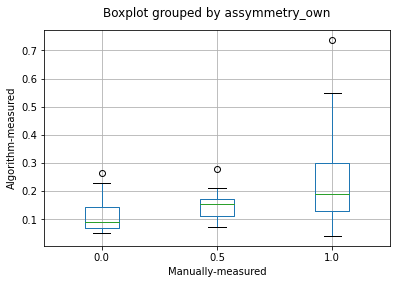

In [6]:
import matplotlib.pyplot as plt
df_concated.boxplot(column='assymmetry', by='assymmetry_own')

# Set labels and title
plt.xlabel('Manually-measured')
plt.ylabel('Algorithm-measured')
plt.title('')

# Show the plot
plt.show()

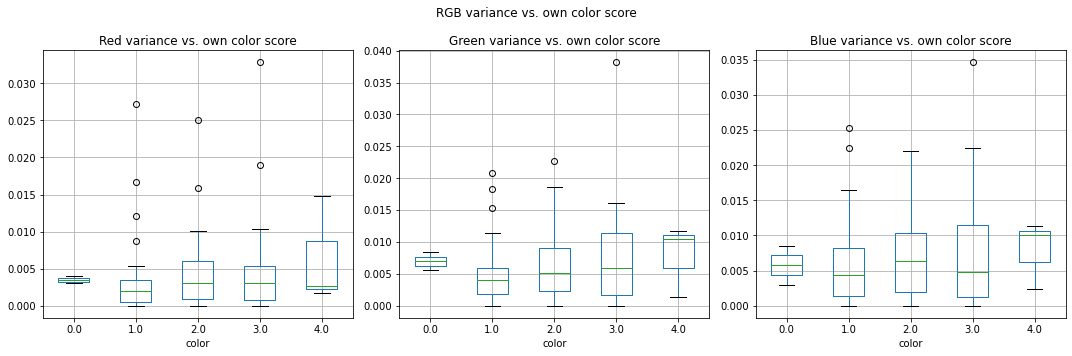

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df_concated.boxplot(column='red_var', by='color', ax = axes[0])
df_concated.boxplot(column='green_var', by='color', ax = axes[1])
df_concated.boxplot(column='blue_var', by='color', ax = axes[2])

axes[0].set_title('Red variance vs. own color score')
axes[1].set_title('Green variance vs. own color score')
axes[2].set_title('Blue variance vs. own color score')

fig.suptitle('RGB variance vs. own color score')
# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

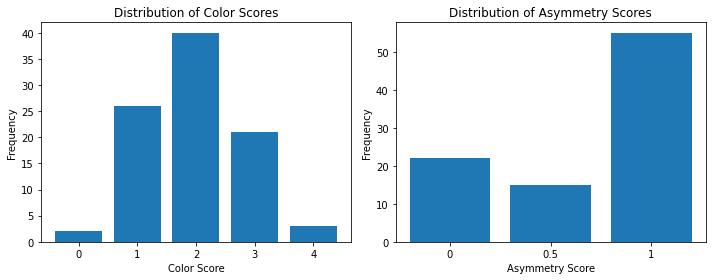

In [8]:
# Data for color scores
color_scores = df_concated.color.tolist()

# Data for asymmetry scores
asymmetry_scores = df_concated.assymmetry_own.tolist()

# Creating score percentage
asymmetry_scores_percent = [(asymmetry_scores.count(score) / len(asymmetry_scores)) * 100 for score in set(asymmetry_scores)]
color_scores_percent = [(color_scores.count(score) / len(color_scores)) * 100 for score in set(color_scores)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Histogram of Color Scores
ax1.hist(color_scores, bins=range(6), align='left', rwidth=0.8)
ax1.set_xlabel('Color Score')
ax1.set_ylabel('Frequency')

ax1.set_title('Distribution of Color Scores')

# Bar Chart of Asymmetry Scores
score_counts = [asymmetry_scores.count(0), asymmetry_scores.count(0.5), asymmetry_scores.count(1)]
score_labels = ['0', '0.5', '1']

ax2.bar(score_labels, score_counts)
ax2.set_xlabel('Asymmetry Score')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Asymmetry Scores')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

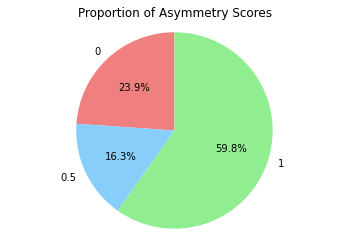

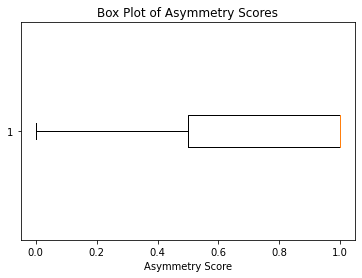

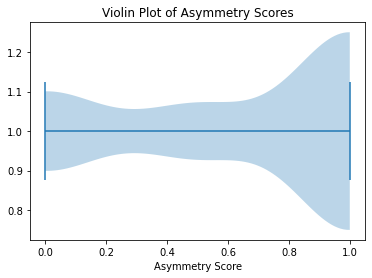

In [9]:
# Pie Chart of Asymmetry Scores
score_labels = ['0', '0.5', '1']
score_sizes = [asymmetry_scores.count(0), asymmetry_scores.count(0.5), asymmetry_scores.count(1)]
score_colors = ['lightcoral', 'lightskyblue', 'lightgreen']

plt.pie(score_sizes, labels=score_labels, colors=score_colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Asymmetry Scores')
plt.show()

# Box Plot
plt.boxplot(asymmetry_scores, vert=False)
plt.xlabel('Asymmetry Score')
plt.title('Box Plot of Asymmetry Scores')
plt.show()

# Violin Plot
plt.violinplot(asymmetry_scores, vert=False)
plt.xlabel('Asymmetry Score')
plt.title('Violin Plot of Asymmetry Scores')
plt.show()
